In [29]:
import os
import csv
import requests
import json
from openai import OpenAI

# Set up API keys
replicate_api_token = os.environ.get("REPLICATE_API_TOKEN")

In [30]:
scene_schema = {
    "type": "json_schema",
    "json_schema": {
        "name": "SceneDataSchema",
        "description": "Schema for scene data, including voice-over and image prompt information.",
        "schema": {
            "type": "object",
            "properties": {
                "voice_over": {"type": "string"},
                "image_prompt": {"type": "string"},
            },
            "required": ["voice_over", "image_prompt"],
            "additionalProperties": False
        },
        "strict": True  
    }
}

In [33]:
OPENAI_MODEL_NAME = "gpt-4o-mini-2024-07-18"

client = OpenAI()

def generate_story_summary(topic: str) -> str:
    response = client.chat.completions.create(
        model=OPENAI_MODEL_NAME,
        messages=[
            {"role": "system", "content": "You are a creative story writer."},
            {
                "role": "user",
                "content": f"Write a short summary for a story about {topic}. Try to be factual if the topic is real",
            },
        ],
    )
    return response.choices[0].message.content

In [43]:
topic = "The story of Achilles the greek hero"
summary = generate_story_summary(topic)

In [44]:
summary

'In ancient Greek mythology, Achilles is a legendary hero of the Trojan War and a central figure in Homer\'s "Iliad." Born to the mortal king Peleus and the sea nymph Thetis, Achilles is renowned for his unmatched strength and bravery in battle. His mother, seeking to make him invulnerable, dipped him in the River Styx, leaving only his heel vulnerable, which later became the source of his tragic downfall.\n\nAs a key warrior in the Greek forces besieging Troy, Achilles is known for his fierce combat skills and his deep sense of honor. The conflict with Agamemnon, the leader of the Greek forces, over the spoils of war leads to Achilles withdrawing from battle, significantly impacting the Greek war effort. His close friend Patroclus\' death at the hands of Hector, the Trojan prince, compels Achilles to rejoin the fight, culminating in his vengeful pursuit of Hector.\n\nAchilles ultimately slays Hector but faces his own fate when he is struck by an arrow, believed to be guided by Apollo,

In [45]:
n_scenes = 5
messages = [
            {
                "role": "system",
                "content": "You are a creative scene writer expert in creating captivating voice over, and also utilizing AI to generate detailed images using image generation model.",
            },
            {
                "role": "user",
                "content": f"Based on this summary: '{summary}', create {n_scenes} scenes to tell the story. For each scene, provide the voice_over text and an image_prompt in the given structure. The voice_over should should be at most 6 sentences, while the image_prompt should be simple and not too complicated.",
            },
            {
                "role": "user",
                "content": "start by creating the first scene."
            }
        ]
scene_prompts = []
for i in range(n_scenes+1):
    response = client.chat.completions.create(
        model=OPENAI_MODEL_NAME,
        messages=messages,
        response_format=scene_schema,
    )
    response_dict = json.loads(response.choices[0].message.content)
    scene_prompts.append((response_dict["voice_over"], response_dict["image_prompt"]))
    messages.append({
        "role": "system",
        "content": f"Scene {i+1}: {response_dict['voice_over']}"
    })
    if i == n_scenes - 1:
        messages.append({
            "role": "user",
            "content": f"Proceed to create the final scene."
        })
    else:
         messages.append({
            "role": "user",
            "content": f"Proceed to create the next scene."
        })


In [46]:
messages

[{'role': 'system',
  'content': 'You are a creative scene writer expert in creating captivating voice over, and image prompt creator.'},
 {'role': 'user',
  'content': 'Based on this summary: \'In ancient Greek mythology, Achilles is a legendary hero of the Trojan War and a central figure in Homer\'s "Iliad." Born to the mortal king Peleus and the sea nymph Thetis, Achilles is renowned for his unmatched strength and bravery in battle. His mother, seeking to make him invulnerable, dipped him in the River Styx, leaving only his heel vulnerable, which later became the source of his tragic downfall.\n\nAs a key warrior in the Greek forces besieging Troy, Achilles is known for his fierce combat skills and his deep sense of honor. The conflict with Agamemnon, the leader of the Greek forces, over the spoils of war leads to Achilles withdrawing from battle, significantly impacting the Greek war effort. His close friend Patroclus\' death at the hands of Hector, the Trojan prince, compels Achil

In [54]:
for a,b in scene_prompts:
    print(a)

In the land of ancient Greece, under the shadow of towering mountains, the tale of Achilles begins. Born to the mighty king Peleus and the sea nymph Thetis, Achilles was destined for greatness. His mother, longing to make him invincible, took him to the mysterious waters of the River Styx, where she submerged him, holding him by his heel. Thus, he gained unmatched strength, but his heel remained his sole vulnerability— a paradox that would shape his fate. The air crackled with destiny as the winds of war began to stir.
Scene 2: As Achilles grew into a formidable warrior, the cries of war echoed across the plains of Troy. The Greek forces, led by Agamemnon, gathered to lay siege to the great city, longing for glory and spoils. Achilles, adorned in gleaming armor, stood at the forefront, his confidence unshakeable. The air was thick with tension as rivalries brewed and alliances formed. Yet, as the drums of war sounded, it became clear that not all battles would be fought on the battlefi

In [52]:
i = 1
for _, p in scene_prompts:
    out = replicate.run(
    "black-forest-labs/flux-schnell",
    input={"prompt": p,
          "output_format": "png"}
    )
    urlretrieve(out[0], f"scene-{i}.png")
    i+=1

In [49]:
import replicate
from PIL import Image
from urllib.request import urlretrieve


out = replicate.run(
    "black-forest-labs/flux-schnell",
    input={"prompt": "wavy colorful abstract patterns, oceans",
          "output_format": "png"}
    )

urlretrieve(out[0], "out.png")
background = Image.open("out.png")

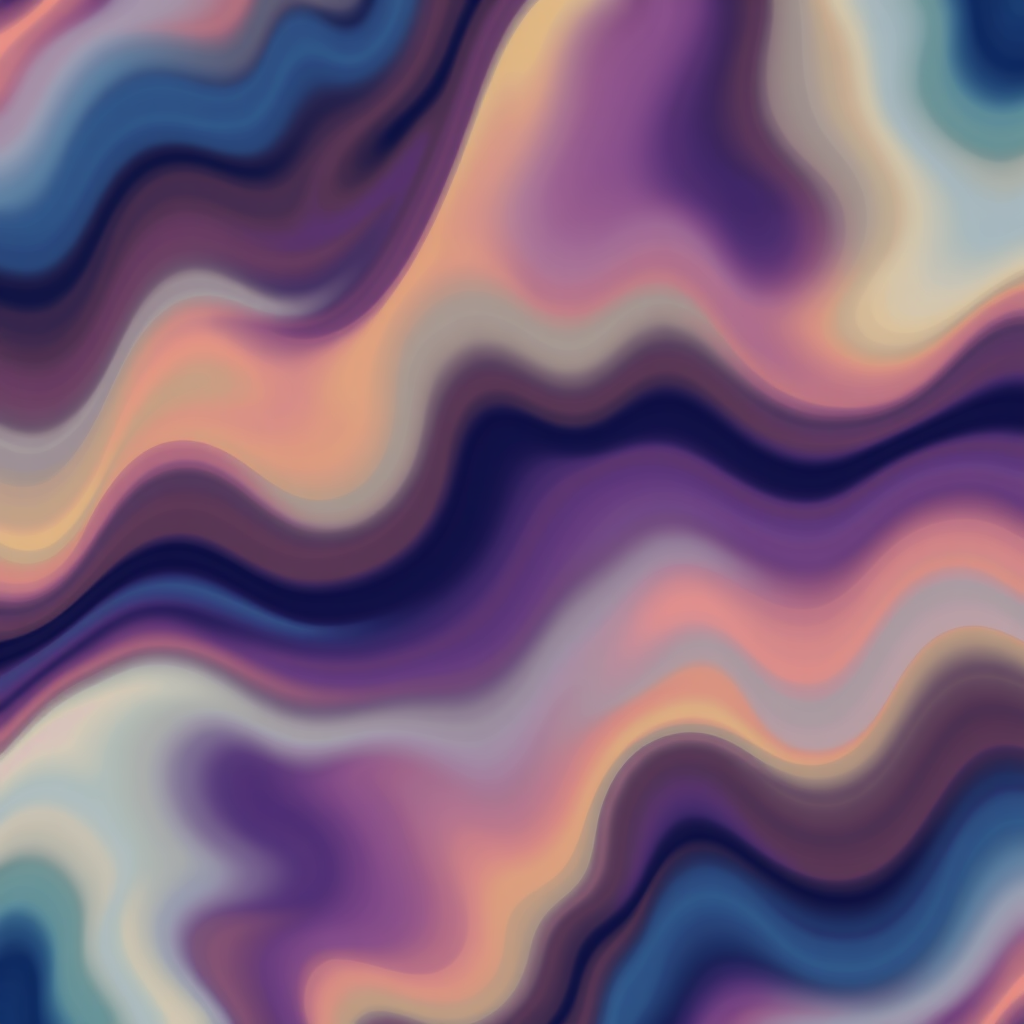

In [50]:
background